**Question 1**

Solution générale: $f=k_1e^{2x}+k_2e^{-2x}+k_3e^{x}+k_4e^{-x}$

**Question 2**

In [1]:
import numpy as np
def ConstantEvaluator(a,b,c,d):
    
    e=np.exp(1)
    e2=np.exp(2)
    e3=np.exp(3)
    
    k1=((1+e+4*e2)*a+(-1-e+2*e2)*b-e*(4+e+e2)*c+e*(-2+e+e2)*d)/((e-1)**3*(1+4*e+e2))
   
    k2=(e2*(-e*((4+e+e2)*a+(-2+e+e2)*b)+(1+e+4*e2)*c+(1+e-2*e2)*d))/((e-1)**3*(1+4*e+e2))
    
    k3=(-2*(1+e+e2+e*e3)*a+(1+e+e2-e*e3)*b+2*e*(3+e+e2+e3)*c-e*(-3+e+e2+e3)*d)/((e-1)**3*(1+4*e+e2))
    
    k4=e*(2*e*(3+e+e2+e3)*a+e*(-3+e+e2+e3)*b-2*(1+e+e2+3*e3)*c+(-1-e-e2+3*e3)*d)/((e-1)**3*(1+4*e+e2))
    
    out=[]
    out.append(k1)
    out.append(k2)
    out.append(k3)
    out.append(k4)
    
    print('a',k1+k2+k3+k4)
    print('b',2*k1-2*k2+k3-k4)
    print('c',k1*np.exp(2)+k2*np.exp(-2)+k3*np.exp(1)+k4*np.exp(-1))
    print('d',2*k1*np.exp(2)-2*k2*np.exp(-2)+k3*np.exp(1)-k4*np.exp(-1))
    
    return out

**Question 3**

On vérifie d'abord la fonction faite à la question précédente avec les valeurs de a,b,c et d.

In [2]:
ConstantEvaluator(0,0,1,-1)

a 0.0
b -8.881784197001252e-16
c 0.9999999999999991
d -1.0000000000000027


[-0.6179392150241841,
 3.352281437944154,
 2.6030495415083528,
 -5.337391764428323]

On voit qu'on obtient des valeurs de a,b,c et d (Temp note for foy:b is a little weird but still reasonably close to 0.0 imo given that the imprecision on b c and are all at about $10^{-16}$)

In [71]:
%matplotlib inline
import matplotlib.pylab as plt

k1=ConstantEvaluator(0,0,1,-1)[0]

k2=ConstantEvaluator(0,0,1,-1)[1]

k3=ConstantEvaluator(0,0,1,-1)[2]

k4=ConstantEvaluator(0,0,1,-1)[3]

def f(x):
    
    out=k1*np.exp(2*x)+k2*np.exp(-2*x)+k3*np.exp(x)+k4*np.exp(-x)
    
    return out

a 0.0
b -8.881784197001252e-16
c 0.9999999999999991
d -1.0000000000000027
a 0.0
b -8.881784197001252e-16
c 0.9999999999999991
d -1.0000000000000027
a 0.0
b -8.881784197001252e-16
c 0.9999999999999991
d -1.0000000000000027
a 0.0
b -8.881784197001252e-16
c 0.9999999999999991
d -1.0000000000000027


In [72]:
xmax=1
x= np.linspace(0,xmax,100)
y=f(x)

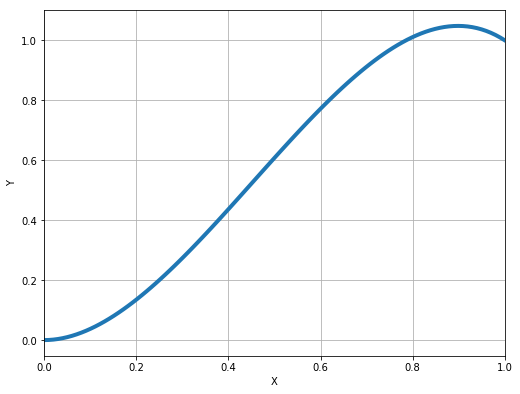

In [73]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y, lw=4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,xmax)
ax.grid()

In [92]:
def A(f,dx): #Gives linear operator corresponding to our linear ODE
    return (f[:-4]-4*f[1:-3]+6*f[2:-2]-4*f[3:-1]+f[4:])/dx**4-5*(f[1:-3]-2*f[2:-2]+f[3:-1])/dx**2+4*f[2:-2]